In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.4)
import altair as alt
from scipy import stats
import statsmodels.api as sm

/Users/tkhan/opt/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [14]:
alleleFrq = pd.read_csv("../data_primary/AlleleFrequency_protRes_2methods.csv")
alleleSelect = alleleFrq[alleleFrq.selectedForStudy==1].ProtRes.values

igE_clinic = pd.read_csv("../data_primary/clinicBool.csv").set_index("Unnamed: 0")
covar = pd.read_csv("../data_primary/covarExted.csv").set_index("QBB_DUMMY_ID")
_commonIdx = set(igE_clinic.index).intersection(covar.index)
print (len(_commonIdx))

797


In [15]:
igE_clinic.head()

,fx1,fx2,fx22,fx5,gx2,phad,t20,wx1
Unnamed: 0,,,,,,,,
SIR000037000001,0,0,0,0,0,0,0,1
SIR000037000002,1,1,1,1,1,1,1,1
SIR000037000003,0,0,0,1,0,1,0,1
SIR000037000004,0,0,0,0,0,0,0,0
SIR000037000005,0,0,0,0,0,0,0,0


In [2]:
igE_clinicRaw = pd.read_csv("../data_primary/clinicIgE_rawData.csv").set_index("QBB_DUMMY_ID")

In [3]:
igE_clinicRaw[igE_clinicRaw>=0.3].fillna(0).astype(bool).sum()

fx1      35
fx2     159
fx22     65
fx5     101
gx2     102
phad    400
t20      77
wx1     211
dtype: int64

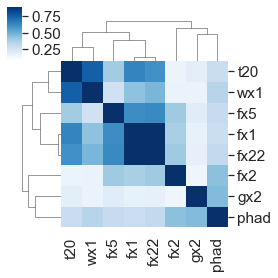

In [79]:
cxRaw = sns.clustermap(igE_clinicRaw.corr(),figsize=(4,4),vmin=0.1,vmax=0.9,cmap='Blues')

In [80]:
cxRaw.savefig("../figures/Fig_1B_correlation.pdf",format="pdf",dpi=300)

In [4]:
# sampleMdata = pd.read_csv("../../QbbBMI_Project/QBB/MAPPING_DUMMYID_BamID_age_gender_eth.csv").set_index("PROJECT_DUMMY_ID")
# !cp ../../QbbBMI_Project/QBB/MAPPING_DUMMYID_BamID_age_gender_eth.csv ../data_primary/
# sampleMdataX.loc[sampleMdataX[['Ethnicity','Gender']].isna().astype(bool).sum(axis=1)[sampleMdataX[['Ethnicity','Gender']].isna().astype(bool).sum(axis=1)!=0].index,'Ethnicity']="Qatari"
# sampleMdataX.to_csv("../data_primary/sampleMetaData.csv")

In [8]:
sampleMdataX = pd.read_csv("../data_primary/sampleMetaData.csv").set_index("PROJECT_DUMMY_ID")
# sampleMdataX = sampleMdataX[['Gender','Ethnicity','Age']].join(igE_clinic)
sampleMdataX.groupby(['Ethnicity','Gender']).size().sum()

797

In [9]:
sampleMdataXAgg = sampleMdataX.groupby(['Ethnicity','Gender'])[['Age','fx1','fx2','fx22','fx5','gx2','t20','wx1','phad']].agg({'Age':['count','min','max','median','std'],'fx1':'sum',
                                                                                                                               'fx2':'sum','fx22':'sum','fx5':'sum','gx2':'sum','t20':'sum','wx1':'sum','phad':'sum'})

In [45]:
sampleMdataXAgg.to_csv("../tables/sampleMetaData.csv")

In [16]:
sampleMdataX['PosAllergenPanels'] = sampleMdataX[igE_clinic.columns].sum(axis=1)

In [18]:
sampleMdataX

,Gender,Ethnicity,Age,fx1,fx2,fx22,fx5,gx2,phad,t20,wx1,PosAllergenPanels
PROJECT_DUMMY_ID,,,,,,,,,,,,
SIR000037000121,Male,Qatari,47,0,0,0,1,0,1,0,0,2
SIR000037000113,Female,Qatari,61,0,0,1,0,1,1,1,1,5
SIR000037000236,Female,Qatari,54,0,0,0,0,0,0,0,0,0
SIR000037000425,Male,Qatari,40,0,0,0,0,0,0,0,0,0
SIR000037000469,Female,Qatari,32,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
SIR000037000543,Female,Qatari,25,0,0,0,1,0,1,1,1,4
SIR000037000211,Male,Qatari,63,0,0,0,0,0,0,0,0,0
SIR000037000075,Female,Qatari,63,0,0,0,0,0,1,0,0,1


In [24]:
alt.Chart(sampleMdataX).mark_bar(width=30).encode(
    x=alt.X('PosAllergenPanels'),#,scale=alt.Scale(domain=[0.2,8])),
    y='count()'
)

alt.Chart(...)

In [12]:
sampleMdataX.groupby("PosAllergenPanels").size()

PosAllergenPanels
0    350
1    173
2    105
3     61
4     43
5     21
6     17
7     11
8     16
dtype: int64

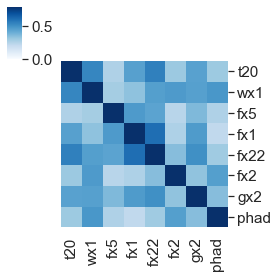

In [64]:
corrMap = sampleMdataX[cxRaw.data2d.index].corr()
cx = sns.clustermap(corrMap,figsize=(4,4),vmin=0,vmax=0.8,cmap='Blues',row_cluster=False,col_cluster=False)

In [38]:
corrMap

,fx1,fx2,fx22,fx5,wx1,gx2,phad,t20
fx1,1.000000,0.260757,0.607342,0.470566,0.329403,0.467786,0.213512,0.448087
fx2,0.260757,1.000000,0.344533,0.234543,0.469012,0.325668,0.453384,0.304362
fx22,0.607342,0.344533,1.000000,0.437724,0.455038,0.503383,0.296870,0.554304
fx5,0.470566,0.234543,0.437724,1.000000,0.284340,0.362121,0.258814,0.258427
wx1,0.329403,0.469012,0.455038,0.284340,1.000000,0.451150,0.484047,0.535361
gx2,0.467786,0.325668,0.503383,0.362121,0.451150,1.000000,0.344098,0.446812
phad,0.213512,0.453384,0.296870,0.258814,0.484047,0.344098,1.000000,0.300312
t20,0.448087,0.304362,0.554304,0.258427,0.535361,0.446812,0.300312,1.000000


In [50]:
corrRaw = cxRaw.data2d

In [75]:
cxV = np.triu(corrRaw)+np.triu(corrMap).T
np.fill_diagonal(cxV,0)
cxV = pd.DataFrame(cxV,columns=corrMap.columns,index=corrMap.index)

<AxesSubplot:>

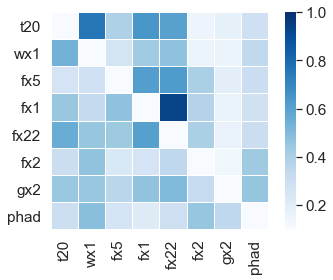

In [90]:
sns.heatmap(cxV,cmap='Blues', vmax=1, vmin=0.1,cbar='blues',square=True, 
            linewidths=.5)


In [25]:
pct_senz = pd.DataFrame((sampleMdataX[cxRaw.data2d.index].sum()/sampleMdataX.shape[0])*100,columns=['pct_sens'])

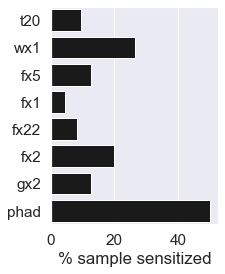

In [26]:
plt.figure(figsize=(3,4))
sns.barplot(y='index',x='pct_sens',data=pct_senz.reset_index(),color='k')
plt.xlabel("% sample sensitized")
plt.ylabel('')
plt.show()

In [64]:
pct_senz['posSamples'] = sampleMdataX[cxRaw.data2d.index].sum()
pct_senz = pct_senz.reset_index()

In [35]:
panelCount = sampleMdataX.groupby('PosAllergenPanels').size().to_frame().rename({0:'numberOfPanels'},axis=1)
panelCount["pctSample"] = (panelCount.numberOfPanels/panelCount.numberOfPanels.sum())*100

In [36]:
panelCount = panelCount.reset_index()
panelCount

,PosAllergenPanels,numberOfPanels,pctSample
0,0,350,43.914680
1,1,173,21.706399
2,2,105,13.174404
3,3,61,7.653701
4,4,43,5.395232
5,5,21,2.634881
6,6,17,2.132999
7,7,11,1.380176
8,8,16,2.007528


In [77]:
bar1 = alt.Chart(panelCount,height=200,width=300).mark_bar(width=25).encode(
    x=alt.X('PosAllergenPanels:O',
            axis=alt.Axis(title="Number of allergen panel",labelFontSize=12,titleFontSize=12,labelAngle=0),
           ),
    y=alt.Y('pctSample',axis=alt.Axis(title="% sample as positive",labelFontSize=12,titleFontSize=12))
)
text =bar1.mark_text(
    align='center',
    baseline='middle',
    dy=-4
).encode(text='numberOfPanels:Q')

fig1Barx = bar1+text
fig1Barx

alt.LayerChart(...)

In [69]:
pct_senz = pct_senz.sort_values('pct_sens')

In [71]:
bar2 = alt.Chart(pct_senz,height=200,width=300).mark_bar(width=25).encode(
    x=alt.X('index',sort=list(pct_senz['index'].values),axis=alt.Axis(title="Allergen Panel",labelFontSize=12,titleFontSize=12)),
    y=alt.Y('pct_sens',axis=alt.Axis(title="% sample",labelFontSize=12,titleFontSize=12))
)
text2 =bar2.mark_text(
    align='center',
    baseline='middle',
    dy=-4
).encode(text='posSamples:Q')

fig2Barx = bar2+text2
fig2Barx

alt.LayerChart(...)

<AxesSubplot:>

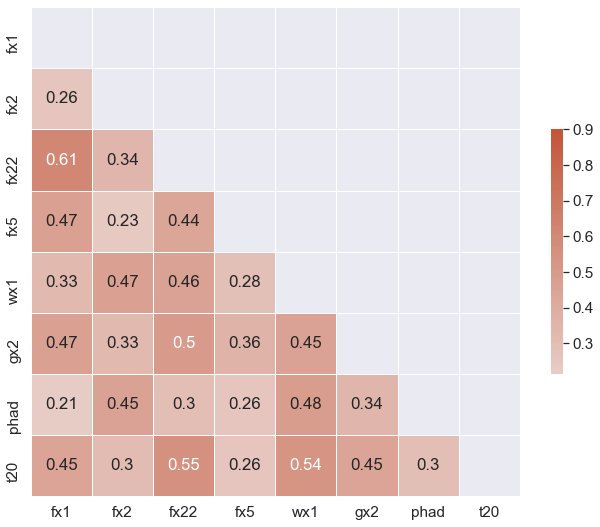

In [49]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cx.data2d, dtype=bool))
mask2 = np.triu(cxRaw.data2d)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMap, mask=mask2, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [28]:
alt.Chart(corrMap).mark_rect().encode(
)

alt.Chart(...)

In [63]:
alleleFrq[alleleFrq.selectedForStudy==1].groupby(['gene'])['AFprot_hd'].agg(['count','min','max'])

,count,min,max
gene,,,
DPA1,1,0.070000,0.070000
DPB1,8,0.018125,0.181250
DQA1,5,0.015625,0.176250
DQB1,11,0.011250,0.153750
DRB1,20,0.011875,0.180625


In [64]:
alleleFrq[alleleFrq.selectedForStudy==1]

,ProtRes,AFprot_hd,AFprot_prg,errorConcord,AF_diff,gene,molecule,selectedForStudy
5,DPA1*02:02,0.070000,0.063125,0.0,0.006875,DPA1,DP,1.0
10,DPB1*01:01,0.036875,0.036875,0.0,0.000000,DPB1,DP,1.0
11,DPB1*02:01,0.181250,0.181250,0.0,0.000000,DPB1,DP,1.0
14,DPB1*04:02,0.034375,0.048125,0.0,0.013750,DPB1,DP,1.0
16,DPB1*09:01,0.018125,0.018125,0.0,0.000000,DPB1,DP,1.0
20,DPB1*10:01,0.023125,0.023125,0.0,0.000000,DPB1,DP,1.0
25,DPB1*13:01,0.051875,0.053750,0.0,0.001875,DPB1,DP,1.0
26,DPB1*14:01,0.073125,0.076250,0.0,0.003125,DPB1,DP,1.0
28,DPB1*17:01,0.024375,0.026250,0.0,0.001875,DPB1,DP,1.0
42,DQA1*01:01,0.031875,0.072500,0.0,0.040625,DQA1,DQ,1.0


In [75]:
prgGT = pd.read_csv("../data_primary/HLA_LA_protGT.csv").set_index("QBB_DUMMY_ID")[alleleSelect].astype(bool).astype(int).loc[_commonIdx]
hdGT = pd.read_csv("../data_primary/HLA_HD_protGT.csv").set_index("QBB_DUMMY_ID")[alleleSelect].astype(bool).astype(int).loc[_commonIdx]

In [115]:
# unadjusted Odds ratio
prgIgEstat = []

for k in prgGT.columns:
    for a in igE_clinic.columns:
        _dfx = igE_clinic[a].to_frame().join(prgGT[k].to_frame())
        _a = _dfx[(_dfx[a]==1)&(_dfx[k]==1)].shape[0]
        _b = _dfx[(_dfx[a]==1)&(_dfx[k]==0)].shape[0]
        _c = _dfx[(_dfx[a]==0)&(_dfx[k]==1)].shape[0]
        _d = _dfx[(_dfx[a]==0)&(_dfx[k]==0)].shape[0]
        odr = _a*_d/(_b*_c)
        posAllergy = _a/(_a+_c)
        negAllergy = _b/(_b+_d)

#         z = [1/_a, 1/_b ,1/_c, 1/_d]
#         y = 1.96*np.sqrt(np.sum(z))
#         _u95 = odr + y
#         _l95 = odr - y
        _pval = stats.fisher_exact([[_a,_b],[_c,_d]])[1]
        prgIgEstat.append([k,a,posAllergy, negAllergy, odr,_pval])

In [122]:
prgIgEstat = pd.DataFrame(prgIgEstat,columns=['allele','allergen','posPrev','negPrev','odr','pval'])
reject,pval_corrected,alphacSidak, alphacBonf = sm.stats.multipletests(prgIgEstat.pval,method='holm',alpha=0.05)
prgIgEstat['pval_Holm'] = pval_corrected

In [131]:
# unadjusted Odds ratio for HLA-HD gnotypes
hdIgEstat = []

for k in hdGT.columns:
    for a in igE_clinic.columns:
        _dfx = igE_clinic[a].to_frame().join(hdGT[k].to_frame())
        _a = _dfx[(_dfx[a]==1)&(_dfx[k]==1)].shape[0]
        _b = _dfx[(_dfx[a]==1)&(_dfx[k]==0)].shape[0]
        _c = _dfx[(_dfx[a]==0)&(_dfx[k]==1)].shape[0]
        _d = _dfx[(_dfx[a]==0)&(_dfx[k]==0)].shape[0]
        odr = _a*_d/(_b*_c)
        posAllergy = _a/(_a+_c)
        negAllergy = _b/(_b+_d)

#         z = [1/_a, 1/_b ,1/_c, 1/_d]
#         y = 1.96*np.sqrt(np.sum(z))
#         _u95 = odr + y
#         _l95 = odr - y
        _pval = stats.fisher_exact([[_a,_b],[_c,_d]])[1]
        hdIgEstat.append([k,a,posAllergy, negAllergy, odr,_pval])

hdIgEstat = pd.DataFrame(hdIgEstat,columns=['allele','allergen','posPrev','negPrev','odr','pval'])
reject,pval_corrected,alphacSidak, alphacBonf = sm.stats.multipletests(hdIgEstat.pval,method='holm',alpha=0.05)
hdIgEstat['pval_Holm'] = pval_corrected

In [135]:
odr_LA = prgIgEstat.pivot(index='allele',columns='allergen',values='odr')
odr_HD = hdIgEstat.pivot(index='allele',columns='allergen',values='odr')

odrCombo = odr_LA.join(odr_HD,lsuffix='_LA')

In [137]:
odrCombo.join(alleleFrq[alleleFrq.selectedForStudy==1].set_index("ProtRes")[["AFprot_hd","AFprot_prg"]])

,fx1_LA,fx2_LA,fx22_LA,fx5_LA,gx2_LA,phad_LA,t20_LA,wx1_LA,fx1,fx2,fx22,fx5,gx2,phad,t20,wx1,AFprot_hd,AFprot_prg
allele,,,,,,,,,,,,,,,,,,
DPA1*02:02,1.213768,1.048304,1.347962,1.076299,1.410278,1.284850,1.379186,1.283912,1.338742,0.963768,1.333524,1.235806,1.440476,1.339986,1.479905,1.329058,0.070000,0.063125
DPB1*01:01,1.254127,1.370115,1.682266,1.552795,1.334248,1.462149,1.369388,1.120000,1.254127,1.370115,1.682266,1.552795,1.334248,1.462149,1.369388,1.120000,0.036875,0.036875
DPB1*02:01,0.944277,0.934906,0.841512,0.903119,1.146916,0.842710,0.701754,0.840547,0.944277,0.934906,0.841512,0.903119,1.146916,0.842710,0.701754,0.840547,0.181250,0.181250
DPB1*04:02,1.700980,0.612549,1.217868,2.110217,0.954133,0.905912,1.168339,1.221081,1.919355,0.715232,1.516581,1.711146,1.259188,0.654183,1.238212,0.823116,0.034375,0.048125
DPB1*09:01,0.800654,0.471538,1.934426,1.154639,0.812121,1.557560,0.711795,0.452496,0.800654,0.471538,1.934426,1.154639,0.812121,1.557560,0.711795,0.452496,0.018125,0.018125
DPB1*10:01,0.693548,0.923077,0.742857,0.983800,0.695925,0.763673,0.965983,0.922824,0.693548,0.923077,0.742857,0.983800,0.695925,0.763673,0.965983,0.922824,0.023125,0.023125
DPB1*13:01,0.555152,0.719623,0.946765,0.903453,0.772125,0.810502,0.772466,0.483340,0.580808,0.678357,0.993021,0.949666,0.811090,0.780754,0.810273,0.509645,0.051875,0.053750
DPB1*14:01,0.527446,0.587961,0.456490,0.598291,0.452611,0.719754,0.642951,0.889801,0.555682,0.624036,0.481481,0.414492,0.478217,0.696503,0.679089,0.853134,0.073125,0.076250
DPB1*17:01,1.093939,0.793421,0.859801,0.927646,1.389474,1.343972,1.281907,1.261059,1.187551,0.718954,0.935484,1.014093,1.526645,1.452752,1.401144,1.414141,0.024375,0.026250
